<a href="https://colab.research.google.com/github/ss1705/ai-traffic-system/blob/main/License_Plate_and_Challan_Generation_Sim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install roboflow ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.2/85.2 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 19.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 974.5/974.5 kB 40.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 80.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 70.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 72.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 48.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9

In [2]:
from roboflow import Roboflow
rf = Roboflow(api_key="avNioyqNDAclBS0QpwBR")
project = rf.workspace("augmented-startups").project("vehicle-registration-plates-trudk")
version = project.version(2)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Vehicle-Registration-Plates-2 in yolov8:: 100%|██████████| 42362/42362 [00:10<00:00, 4069.44it/s]


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [4]:
from ultralytics import YOLO

model = YOLO("yolov8n.pt")

model.train(data="/content/Vehicle-Registration-Plates-2/data.yaml", epochs=30, imgsz=416, batch=32, device="cuda")

Ultralytics 8.3.107 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/Vehicle-Registration-Plates-2/data.yaml, epochs=30, time=None, patience=100, batch=32, imgsz=416, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_

train: Scanning /content/Vehicle-Registration-Plates-2/train/labels.cache... 18528 images, 18 backgrounds, 0 corrupt: 100%|██████████| 18528/18528 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/Vehicle-Registration-Plates-2/valid/labels.cache... 1765 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1765/1765 [00:00<?, ?it/s]


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 416 train, 416 val
Using 2 dataloader workers
Logging results to runs/detect/train2
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30       1.8G      1.238      1.118      1.088         57        416: 100%|██████████| 579/579 [02:37<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:10<00:00,  2.68it/s]

                   all       1765       1840      0.969      0.907       0.94      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      2.22G      1.213     0.6894      1.075         41        416: 100%|██████████| 579/579 [02:43<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:09<00:00,  3.04it/s]


                   all       1765       1840      0.987      0.929      0.964      0.646

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      2.23G      1.199     0.6495      1.071         41        416: 100%|██████████| 579/579 [02:34<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:08<00:00,  3.27it/s]

                   all       1765       1840      0.978      0.936      0.964      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      2.23G      1.185     0.6231      1.066         68        416: 100%|██████████| 579/579 [02:34<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:08<00:00,  3.14it/s]


                   all       1765       1840      0.977      0.933      0.957      0.639

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      2.23G      1.156     0.5941      1.052         50        416: 100%|██████████| 579/579 [02:33<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:09<00:00,  3.11it/s]


                   all       1765       1840      0.969      0.937      0.963      0.665

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      2.23G      1.147     0.5778      1.044         55        416: 100%|██████████| 579/579 [02:34<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:09<00:00,  3.04it/s]


                   all       1765       1840      0.981      0.941      0.968      0.668

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      2.23G      1.129     0.5512      1.042         39        416: 100%|██████████| 579/579 [02:33<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:08<00:00,  3.39it/s]


                   all       1765       1840       0.98      0.946      0.967      0.674

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      2.25G      1.113     0.5393      1.039         56        416: 100%|██████████| 579/579 [02:33<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:09<00:00,  3.05it/s]


                   all       1765       1840      0.986      0.945      0.972      0.681

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      2.25G      1.099     0.5272      1.031         60        416: 100%|██████████| 579/579 [02:33<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:09<00:00,  3.08it/s]


                   all       1765       1840      0.983      0.949      0.974       0.69

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      2.25G      1.096     0.5201      1.027         54        416: 100%|██████████| 579/579 [02:33<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:09<00:00,  3.08it/s]

                   all       1765       1840      0.979      0.954      0.976      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      2.25G      1.088     0.5077      1.025         53        416: 100%|██████████| 579/579 [02:34<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:08<00:00,  3.41it/s]


                   all       1765       1840      0.981      0.949      0.975      0.692

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      2.25G      1.079     0.5016       1.02         46        416: 100%|██████████| 579/579 [02:34<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:09<00:00,  2.98it/s]


                   all       1765       1840      0.981      0.947      0.974      0.693

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      2.25G      1.078     0.4949      1.022         59        416: 100%|██████████| 579/579 [02:34<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:09<00:00,  3.04it/s]

                   all       1765       1840      0.983      0.954      0.979      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      2.27G      1.069     0.4864      1.015         55        416: 100%|██████████| 579/579 [02:32<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:09<00:00,  3.11it/s]

                   all       1765       1840      0.984      0.954      0.977      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      2.27G      1.064     0.4794      1.015         51        416: 100%|██████████| 579/579 [02:33<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:08<00:00,  3.40it/s]


                   all       1765       1840      0.983      0.957      0.979      0.698

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      2.27G      1.057     0.4749      1.012         48        416: 100%|██████████| 579/579 [02:32<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:09<00:00,  3.03it/s]

                   all       1765       1840      0.983      0.958      0.981      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      2.27G      1.052     0.4686       1.01         59        416: 100%|██████████| 579/579 [02:33<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:09<00:00,  3.06it/s]


                   all       1765       1840       0.98       0.96      0.981      0.708

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      2.27G      1.039      0.461      1.005         39        416: 100%|██████████| 579/579 [02:32<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:08<00:00,  3.36it/s]

                   all       1765       1840       0.98      0.958      0.978      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      2.27G      1.033     0.4547      1.003         45        416: 100%|██████████| 579/579 [02:32<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:09<00:00,  3.02it/s]


                   all       1765       1840      0.987      0.954       0.98      0.706

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      2.27G       1.03     0.4487      1.002         62        416: 100%|██████████| 579/579 [02:34<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:09<00:00,  3.06it/s]


                   all       1765       1840      0.982      0.961      0.983       0.71
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      2.27G      1.014     0.3997     0.9967         33        416: 100%|██████████| 579/579 [02:26<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:09<00:00,  2.88it/s]


                   all       1765       1840      0.979      0.959      0.977      0.713

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      2.27G      1.003     0.3929     0.9956         32        416: 100%|██████████| 579/579 [02:24<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:09<00:00,  3.08it/s]

                   all       1765       1840      0.984      0.959      0.982      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      2.27G     0.9953     0.3856     0.9888         34        416: 100%|██████████| 579/579 [02:25<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:09<00:00,  3.10it/s]


                   all       1765       1840      0.981      0.965      0.984      0.717

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      2.27G     0.9833     0.3773     0.9859         32        416: 100%|██████████| 579/579 [02:24<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:09<00:00,  3.10it/s]

                   all       1765       1840      0.979      0.961      0.981      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      2.27G      0.975     0.3696     0.9813         33        416: 100%|██████████| 579/579 [02:24<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:09<00:00,  3.11it/s]


                   all       1765       1840      0.983      0.962      0.982      0.718

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      2.27G     0.9667     0.3668     0.9778         33        416: 100%|██████████| 579/579 [02:24<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:09<00:00,  3.09it/s]


                   all       1765       1840      0.982      0.961       0.98      0.717

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      2.29G     0.9604     0.3588     0.9739         33        416: 100%|██████████| 579/579 [02:24<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:08<00:00,  3.13it/s]

                   all       1765       1840      0.985      0.959      0.982      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      2.29G     0.9484     0.3524     0.9709         33        416: 100%|██████████| 579/579 [02:24<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:08<00:00,  3.12it/s]

                   all       1765       1840      0.984      0.955      0.981      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      2.29G     0.9426     0.3459     0.9669         31        416: 100%|██████████| 579/579 [02:31<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:08<00:00,  3.41it/s]


                   all       1765       1840      0.978      0.963      0.983      0.718

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      2.29G     0.9358     0.3407     0.9643         32        416: 100%|██████████| 579/579 [02:25<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:08<00:00,  3.33it/s]

                   all       1765       1840      0.979      0.965      0.982      0.718



30 epochs completed in 1.341 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 6.2MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics 8.3.107 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:11<00:00,  2.44it/s]


                   all       1765       1840      0.978      0.963      0.983      0.718
Speed: 0.1ms preprocess, 0.9ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to runs/detect/train2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7a75c6129a90>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [16]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [8]:
!pip install easyocr

In [9]:
import easyocr
import cv2

reader = easyocr.Reader(['en'])

image_path = "/content/drive/MyDrive/TrafficLLM/license1.jpg"
image = cv2.imread(image_path)

results = reader.readtext(image)

for (bbox, text, prob) in results:
    print(f"Detected: {text} (Confidence: {prob:.2f})")

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% CompleteDetected: Ty (Confidence: 0.28)
Detected: 5ZX (Confidence: 0.13)
Detected: W (Confidence: 0.33)
Detected: GoMechanic (Confidence: 0.70)
Detected: HR26DO555 1 (Confidence: 0.42)
Detected: INDI (Confidence: 0.89)


In [14]:
image_path = "/content/drive/MyDrive/TrafficLLM/license2.jpg"
image = cv2.imread(image_path)

results = reader.readtext(image)

for (bbox, text, prob) in results:
    print(f"Detected: {text} (Confidence: {prob:.2f})")

Detected: CCC444 (Confidence: 0.29)
Detected: T ES [ A.C0 M (Confidence: 0.20)
Detected: DUAL (Confidence: 0.09)
Detected: Motor (Confidence: 0.83)


In [20]:
image_path = "/content/license3.jpg"
image = cv2.imread(image_path)

results = reader.readtext(image)

for (bbox, text, prob) in results:
    print(f"Detected: {text} (Confidence: {prob:.2f})")

Detected: aia (Confidence: 0.13)
Detected: IPLS B 18/ (Confidence: 0.34)


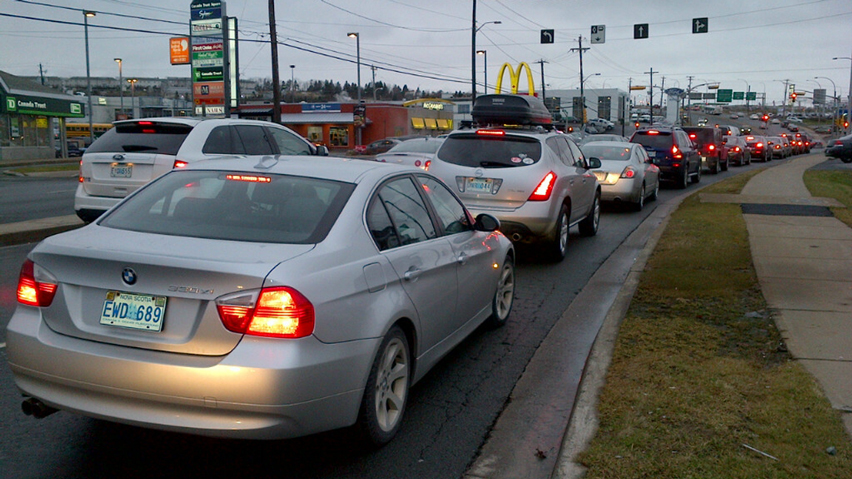

In [21]:
image_path = "/content/normal.jpg"
image = cv2.imread(image_path)

results = reader.readtext(image)

for (bbox, text, prob) in results:
    print(f"Detected: {text} (Confidence: {prob:.2f})")

Detected: Ewd : 689 (Confidence: 0.34)


In [22]:
import sqlite3

In [23]:
conn = sqlite3.connect('traffic_violation.db')
cursor = conn.cursor()

In [24]:
cursor.execute('''
CREATE TABLE IF NOT EXISTS violations (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    plate_number TEXT NOT NULL,
    timestamp DATETIME DEFAULT CURRENT_TIMESTAMP,
    violation_type TEXT,
    confidence REAL
)
''')
conn.commit()

In [25]:
# Let's assume 'text' and 'prob' are extracted from EasyOCR
plate_number = text
confidence = float(prob)
violation_type = "Unknown"  # You can integrate this later with YOLO + DeepSORT

cursor.execute('''
INSERT INTO violations (plate_number, violation_type, confidence)
VALUES (?, ?, ?)
''', (plate_number, violation_type, confidence))
conn.commit()
print("✅ Data inserted into database.")


✅ Data inserted into database.


In [26]:
# Fetch all records
cursor.execute('SELECT * FROM violations')
rows = cursor.fetchall()

print("🚨 Violation Challan Data:")
for row in rows:
    print(f"ID: {row[0]}, Plate: {row[1]}, Time: {row[2]}, Violation: {row[3]}, Confidence: {row[4]:.2f}")

🚨 Violation Challan Data:
ID: 1, Plate: Ewd : 689, Time: 2025-04-13 12:14:14, Violation: Unknown, Confidence: 0.34


In [27]:
!pip install fpdf

  Preparing metadata (setup.py) ... done
  Created wheel for fpdf: filename=fpdf-1.7.2-py2.py3-none-any.whl size=40704 sha256=ba55f8f8dd8b3bc2483d8b2b5ef1b8264efa66477d55d138d38abc70f18a333c
  Stored in directory: /root/.cache/pip/wheels/65/4f/66/bbda9866da446a72e206d6484cd97381cbc7859a7068541c36
Successfully built fpdf


In [28]:
from fpdf import FPDF
import sqlite3

In [31]:
conn = sqlite3.connect('traffic_violation.db')
cursor = conn.cursor()
cursor.execute("SELECT * FROM violations ORDER BY id DESC LIMIT 1")
record = cursor.fetchone()
conn.close()

In [40]:
record

(1, 'Ewd : 689', '2025-04-13 12:14:14', 'Unknown', 0.33576750119453586)

In [41]:
pdf = FPDF()
pdf.add_page()
pdf.set_font("Arial", size=12)

In [42]:
pdf.cell(200, 10, txt="Traffic Violation Challan", ln=True, align='C')
pdf.ln(10)

In [45]:
labels = ["Challan ID", "Plate Number", "Date & Time", "Violation", "Confidence"]
for label, value in zip(labels, record):
    pdf.cell(200, 10, txt=f"{label}: {value}", ln=True)

In [46]:
pdf.output("sim-challan.pdf")
print("✅ Challan saved as challan.pdf")

✅ Challan saved as challan.pdf


##Pipeline

In [47]:
import cv2
import easyocr
import sqlite3
from datetime import datetime
from fpdf import FPDF

In [48]:
reader = easyocr.Reader(['en'])

In [49]:
image_path = "/content/license3.jpg"  # cropped license plate image
image = cv2.imread(image_path)
results = reader.readtext(image)

In [51]:
if results:
    results.sort(key=lambda x: x[2], reverse=True)  # sort by confidence
    plate_number = results[0][1]
else:
    plate_number = "UNKNOWN"

In [52]:
conn = sqlite3.connect("violations.db")
cursor = conn.cursor()

In [53]:
cursor.execute("""
CREATE TABLE IF NOT EXISTS vehicle_records (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    plate_number TEXT,
    timestamp TEXT,
    location TEXT,
    violation TEXT
)
""")

In [54]:
timestamp = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
location = "Guindy, Chennai"
violation = "Seatbelt Violation"

In [55]:
cursor.execute("""
    INSERT INTO vehicle_records (plate_number, timestamp, location, violation)
    VALUES (?, ?, ?, ?)
""", (plate_number, timestamp, location, violation))

In [56]:
record_id = cursor.lastrowid
cursor.execute("SELECT * FROM vehicle_records WHERE id = ?", (record_id,))
record = cursor.fetchone()

In [57]:
conn.commit()
conn.close()

In [58]:
class ChallanPDF(FPDF):
    def header(self):
        # Title
        self.set_font("Helvetica", "B", 16)
        self.set_text_color(30, 30, 30)
        self.cell(0, 10, "Traffic Violation Challan", ln=True, align="C")
        self.ln(5)
        self.set_line_width(0.5)
        self.line(10, self.get_y(), 200, self.get_y())
        self.ln(10)

    def challan_table(self, labels, data):
        self.set_font("Helvetica", "", 12)
        self.set_fill_color(240, 240, 240)
        self.set_text_color(0)

        col_width = 50
        value_width = 120

        for label, value in zip(labels, data):
            self.set_font("Helvetica", "B", 12)
            self.cell(col_width, 10, f"{label}:", border=1, align="L", fill=True)
            self.set_font("Helvetica", "", 12)
            self.cell(value_width, 10, str(value), border=1, align="L")
            self.ln()

    def footer(self):
        self.set_y(-15)
        self.set_font("Helvetica", "I", 9)
        self.set_text_color(128)
        self.cell(0, 10, "Generated by AI-powered Traffic Monitoring System", align="C")

In [59]:
pdf = ChallanPDF()
pdf.add_page()

In [60]:
labels = ["Challan ID", "Plate Number", "Date & Time", "Location", "Violation"]
pdf.challan_table(labels, record)

In [61]:
filename = f"challan_{record_id}.pdf"
pdf.output(filename)
print(f"✅ Improved Challan PDF generated: {filename}")

✅ Improved Challan PDF generated: challan_1.pdf
